[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [108]:
# Cargar el dataset ISOLET.csv desde la carpeta Dataset
import pandas as pd
import numpy as np

# Cargar los datos del archivo ISOLET.csv
data = pd.read_csv('../Dataset/ISOLET.csv', header=None)
X = data.values

print(f"Dataset ISOLET cargado:")
print(f"Forma del dataset: {X.shape}")
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"Rango de valores: [{X.min():.3f}, {X.max():.3f}]")

Dataset ISOLET cargado:
Forma del dataset: (7797, 617)
Número de muestras: 7797
Número de características: 617
Rango de valores: [-1.000, 1.000]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

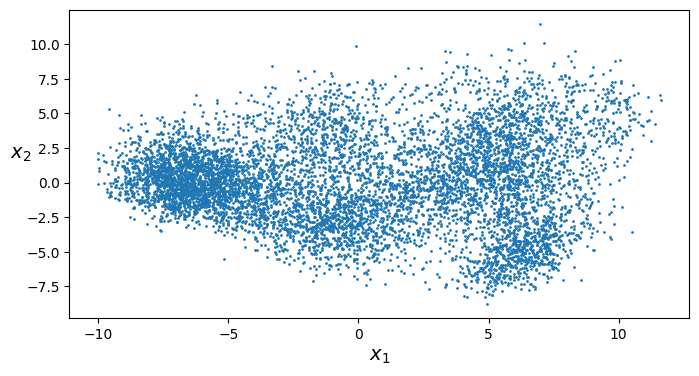

In [109]:
plt.figure(figsize=(8, 4))
plot_clusters(X_2d)
plt.show()

En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

In [110]:
from sklearn.cluster import KMeans

k = 26
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([15,  1, 15, ..., 19, 10, 10])

In [10]:
kmeans.cluster_centers_

array([[-0.39006116,  0.19176147,  0.47852294, ...,  0.11306177,
         0.00621651, -0.34579388],
       [-0.39465979,  0.15933979,  0.37247794, ...,  0.05695258,
        -0.05299423, -0.3979266 ],
       [-0.50547345, -0.06316   ,  0.14114109, ...,  0.14576291,
         0.02523636, -0.34759564],
       ...,
       [-0.35411733,  0.16934667,  0.42667733, ...,  0.21821067,
         0.08038933, -0.32793867],
       [-0.55538968, -0.16983032, -0.05423806, ...,  0.03715097,
        -0.0452329 , -0.40449871],
       [-0.31020282,  0.27596419,  0.45894044, ...,  0.14621489,
         0.05291509, -0.30752797]])

In [11]:
X_new = np.random.uniform(-1.0, 1.0, (4, 617))
kmeans.predict(X_new)

array([16, 16, 16, 16])

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=100, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

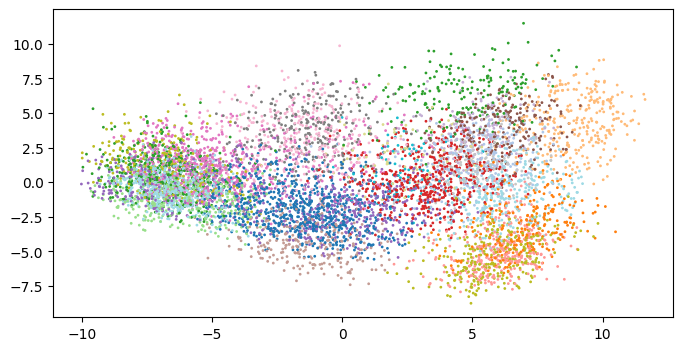

In [111]:
labels = kmeans.predict(X)
plt.figure(figsize=(8,4))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, s=1, cmap='tab20')
plt.show()



En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

In [19]:
kmeans.transform(X_new)

array([[19.19579617, 19.94912244, 19.69440532, 19.43642425, 19.77863306,
        19.34202245, 19.7699438 , 19.66757816, 19.25797746, 20.3799253 ,
        19.38922398, 19.31810482, 18.71854479, 19.00289266, 19.31363585,
        19.48195715, 17.61907956, 19.01626004, 18.68267907, 19.34110651,
        19.29726223, 19.97608868, 19.06680569, 19.27083692, 19.8316526 ,
        19.84656884],
       [18.63842664, 19.03693611, 18.96111666, 19.42652141, 19.15603051,
        18.98566135, 19.22888696, 19.05025122, 18.30236472, 19.95316969,
        18.95744765, 18.56194699, 18.79939534, 18.62892063, 19.07777524,
        19.10871984, 17.43277484, 18.13739829, 18.22871299, 18.9807257 ,
        19.0261035 , 19.58390624, 18.61498474, 18.75685319, 18.78418302,
        19.43137526],
       [19.82096297, 20.03385579, 20.15028511, 20.10302535, 20.08530973,
        20.06128431, 19.9076418 , 20.00462149, 19.71886521, 20.51091611,
        19.67537875, 19.76773884, 19.77149391, 20.03578541, 19.61260413,
       

Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

In [20]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                    #  algorithm="full", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                    #  algorithm="lloyd", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=5,
                    #  algorithm="elkan", max_iter=1, random_state=1)
# Configuración del modelo K-Means con inicialización inteligente
kmeans_iter1 = KMeans(n_clusters=26, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=3, random_state=4)
# kmeans_iter2 = KMeans(n_clusters=26, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=26, init="random", n_init=5,
#                      algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter2 = KMeans(n_clusters=26, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)

# kmeans_iter3 = KMeans(n_clusters=26, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=26, init="random", n_init=5,
#                      algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter3 = KMeans(n_clusters=26, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', max_iter=3, n_clusters=26, n_init=1, random_state=5)

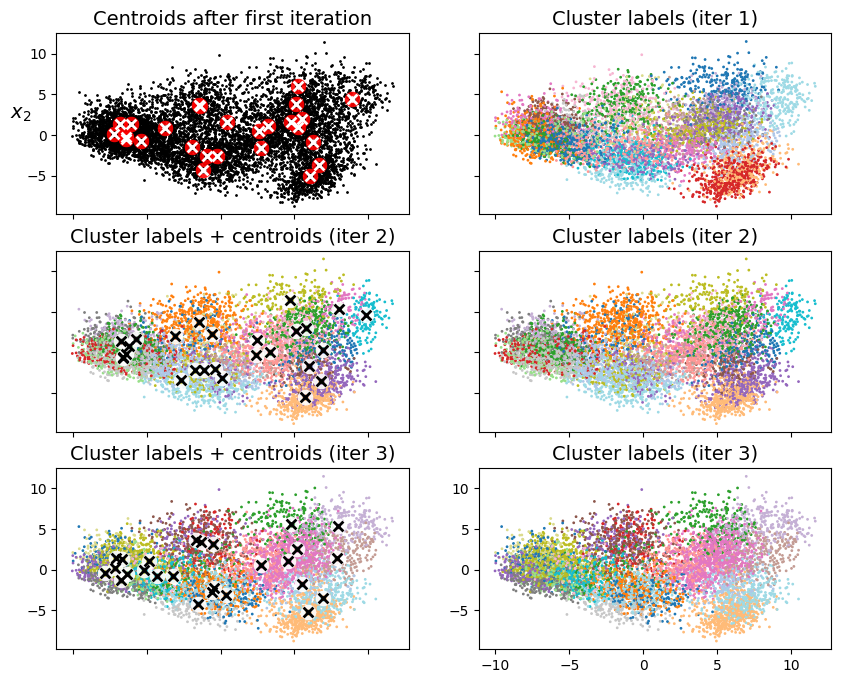

In [21]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_2d)
# Centroides proyectados a 2D con PCA
plot_centroids(pca.transform(kmeans_iter1.cluster_centers_), circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Centroids after first iteration", fontsize=14)

plt.subplot(322)
labels = kmeans_iter1.predict(X)  # predicción en 617D
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.title("Cluster labels (iter 1)", fontsize=14)
plt.tick_params(labelleft=False, labelbottom=False)

plt.subplot(323)
labels = kmeans_iter2.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plot_centroids(pca.transform(kmeans_iter2.cluster_centers_))
plt.title("Cluster labels + centroids (iter 2)", fontsize=14)
plt.tick_params(labelleft=False, labelbottom=False)

plt.subplot(324)
labels = kmeans_iter2.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.title("Cluster labels (iter 2)", fontsize=14)
plt.tick_params(labelleft=False, labelbottom=False)

plt.subplot(325)
labels = kmeans_iter3.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plot_centroids(pca.transform(kmeans_iter3.cluster_centers_))
plt.title("Cluster labels + centroids (iter 3)", fontsize=14)
plt.tick_params(labelbottom=False)

plt.subplot(326)
labels = kmeans_iter3.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.title("Cluster labels (iter 3)", fontsize=14)
plt.show()


Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [22]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

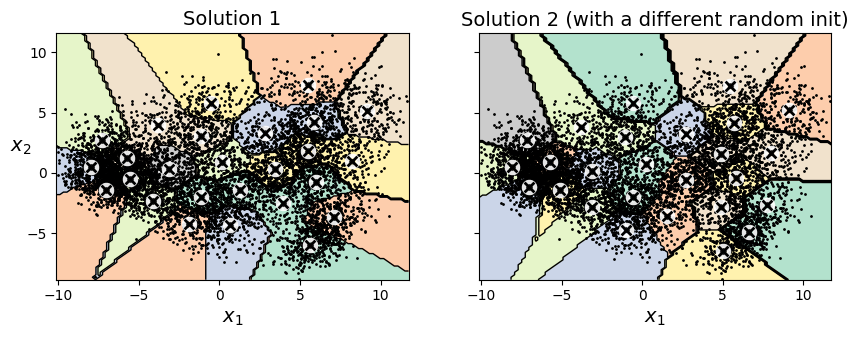

In [23]:
kmeans_rnd_init1 = KMeans(n_clusters=26, init="random", n_init=1,
                         algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=26, init="random", n_init=1,
                         algorithm="elkan", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X_2d,"Solution 1", "Solution 2 (with a different random init)")

plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [24]:
kmeans_rnd_10_inits = KMeans(n_clusters=26, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=26, n_init=10,
       random_state=11)

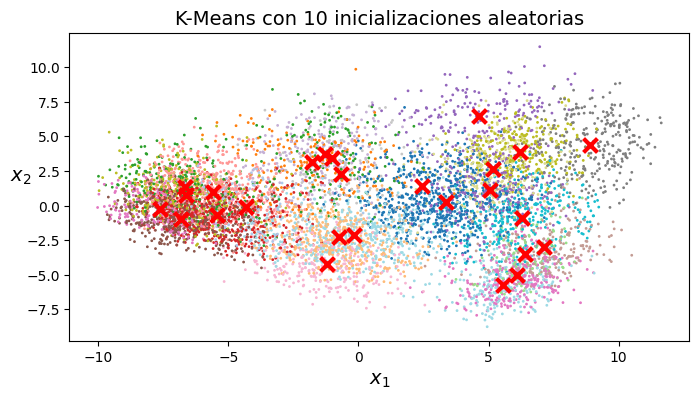

In [27]:
# Visualizar los resultados del clustering
labels = kmeans_rnd_10_inits.predict(X)
plt.figure(figsize=(8, 4))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.scatter(pca.transform(kmeans_rnd_10_inits.cluster_centers_)[:, 0], 
           pca.transform(kmeans_rnd_10_inits.cluster_centers_)[:, 1], 
           c='red', marker='x', s=100, linewidth=3)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.title("K-Means con 10 inicializaciones aleatorias", fontsize=14)
plt.show()

Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset MNIST, para lo cual usaremos el objeto [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=minibatchkmeans#sklearn.cluster.MiniBatchKMeans).

In [28]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [30]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 26
n_init = 10
n_iterations = 50
batch_size = 200
init_size = 1000
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [114]:
best_kmeans.score(X)

-448866.28236351785

El algoritmo de *mini-batch K-Means* es más rápido que *K-Means* normal, pero su precisión suele ser peor.

### Encontrando el número óptimo de grupos

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

In [112]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.08867402115746782

Calculando la métrica para diferentes números de *clusters* podemos encontrar el valor óptimo.

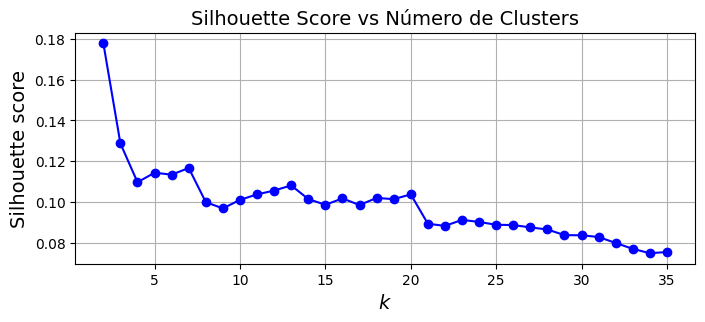

In [113]:
max_k = 35  # Hasta 35 clusters para analizar alrededor de las 26 letras
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, max_k + 1)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

# Generar eje x para k de 2 hasta max_k
ks = list(range(2, max_k + 1))

plt.figure(figsize=(8, 3))
plt.plot(ks, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("Silhouette Score vs Número de Clusters", fontsize=14)
plt.grid(True)
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

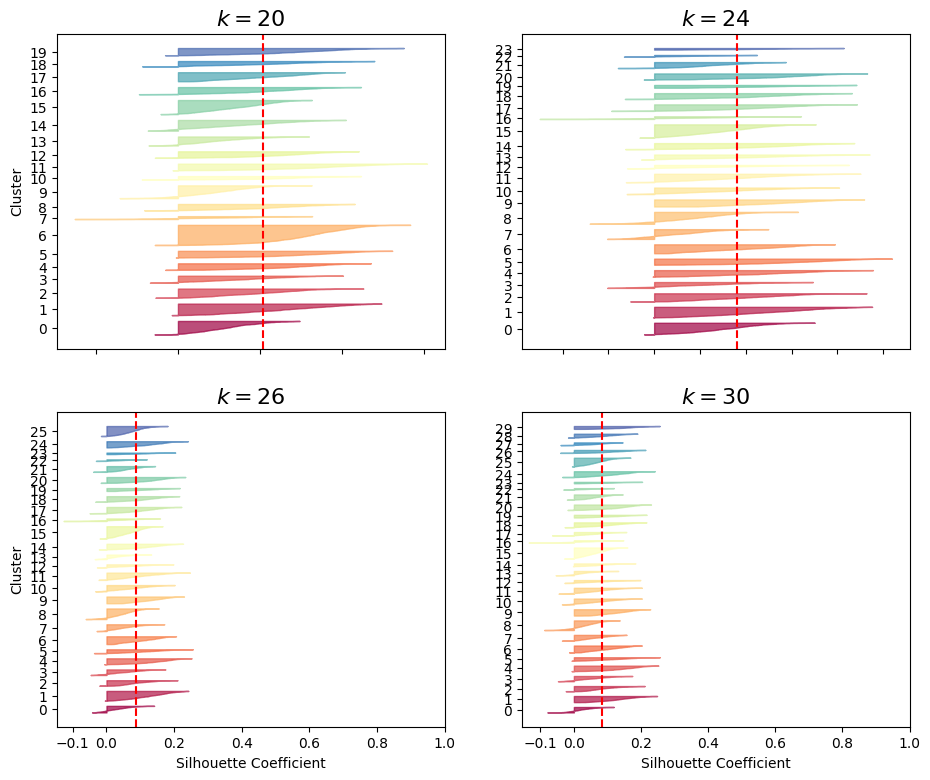

In [35]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

# for k in (3, 4, 5, 6):
#     plt.subplot(2, 2, k - 2)

valid_ks = [k for k in (20, 24, 26, 30) if k <= len(kmeans_per_k)]  # Valores alrededor de 26 letras


for plot_idx, k in enumerate(valid_ks):
    plt.subplot(2, 2, plot_idx + 1)  # enumerar para evitar errores


    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (20, 26):
        plt.ylabel("Cluster")

    if k in (26, 30):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()